# Agrupamiento basado en densidad. DBSCAN y OPTICS

En esta práctica vamos a utilizar bases de datos sintéticas para estudiar el comportamiento de los algoritmos. Una de ellas es la misma que la de la práctica anterior, así podrás comparar su efectividad.

##  DBSCAN 
tiene dos parámetros $\varepsilon$ y MinPts. Como sabes, es muy sensible a ambos (pequeñas variaciones en su valor dan lugar a resultados muy diferentes).

### Ejercicio 1. Observación de resultados entre K-Means y DBSCAN sobre un dataset sintético.
Vamos a crear un dataset que no tiene una forma definida para observar el comportamiento diferente de estos dos algoritmos. No vamos a poder interpretar el resultado, ya que los datos solo tienen sentido espacialmente, pero ayuda a comprender el diferente comportamiento de los dos algoritmos.

**Generación del dataset sintético**
Observa y comprende el código de la caja siguiente para generar el dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import DBSCAN


# Define a function to generate clusters
def cluster_gen(n_clusters, pts_minmax=(10, 100), x_mult=(1, 4), y_mult=(1, 3), 
                x_off=(0, 50), y_off=(0, 50)):
    
    # n_clusters = number of clusters to generate
    # pts_minmax = range of number of points per cluster 
    # x_mult = range of multiplier to modify the size of cluster in the x-direction
    # y_mult = range of multiplier to modify the size of cluster in the x-direction
    # x_off = range of cluster position offset in the x-direction
    # y_off = range of cluster position offset in the y-direction
    
    # Initialize some empty lists to receive cluster member positions
    clusters_x = []
    clusters_y = []
    
    
    # Bloque 1
    n_points = np.random.randint(pts_minmax[0], pts_minmax[1], n_clusters)
    x_multipliers = np.random.randint(x_mult[0], x_mult[1], n_clusters)
    y_multipliers = np.random.randint(y_mult[0], y_mult[1], n_clusters)
    x_offsets = np.random.randint(x_off[0], x_off[1], n_clusters)
    y_offsets = np.random.randint(y_off[0], y_off[1], n_clusters)
     
    # Bloque2
    for idx, npts in enumerate(n_points):
        
        xpts = np.random.randn(npts) * x_multipliers[idx] + x_offsets[idx]
        ypts = np.random.randn(npts) * y_multipliers[idx] + y_offsets[idx]
        clusters_x.append(xpts)
        clusters_y.append(ypts)
    
    # Return cluster positions
    return clusters_x, clusters_y



# Generate some clusters!
n_clusters = 50
clusters_x, clusters_y = cluster_gen(n_clusters)
# Convert to a single dataset in OpenCV format
data = np.float32((np.concatenate(clusters_x), np.concatenate(clusters_y))).transpose()


**Actividad1** Explica en esta caja qué hacen los trozos de código del bloque anterior identificados como 'Bloque 1' y 'Bloque 2'

<font color='blue'>
    
- **Bloque 1**: se generan n_clusters valores aleatorios entre 10 y 100, n_clusters valores aleatorios entre 1 y 4, n_clusters valores aleatorios entre 1 y 3, n_clusters valores aleatorios entre 0 y 50 y n_clusters valores aleatorios entre 0 y 50.

- **Bloque 2**: a partir de los valores generados en el Bloque 1, se crean las coordenadas x e y de los clusters.


**Ejecución de DBSCAN**
La librería scikit posee una clase que implementa DBSCAN. 

**Actividad2** Consulta la librería en la web de scikit y explica qué son los argumentos 'eps' y 'min_samples' de la función DBSCAN.

<font color='blue'>

- **eps**: distancia máxima entre dos muestras para que una se considere en la vecindad de la otra.
- **min_samples**: número de muestras (o peso total) en una vecindad para que un punto se considere un punto central. Esto incluye el punto en sí.

</font>

Escribe aquí cómo sería la llamada a DBSCAN para estas condiciones: $\varepsilon = 0.7$, MinPts=12, métrica de Minkowski con p=3

**Escribe aquí la llamada a la función DBSCAN:**

<font color='blue'>
DBSCAN(eps=0.7, min_samples=12, p=3)
</font>

**Fin Actividad2**

Ejecuta el código de abajo que realiza un DBSCAN sobre el dataset y observa el resultado en las figuras. ¿Qué son los puntos de color negro que aparecen en la figura de la derecha?

<font color='blue'>
Son los puntos etiquetados como ruido.

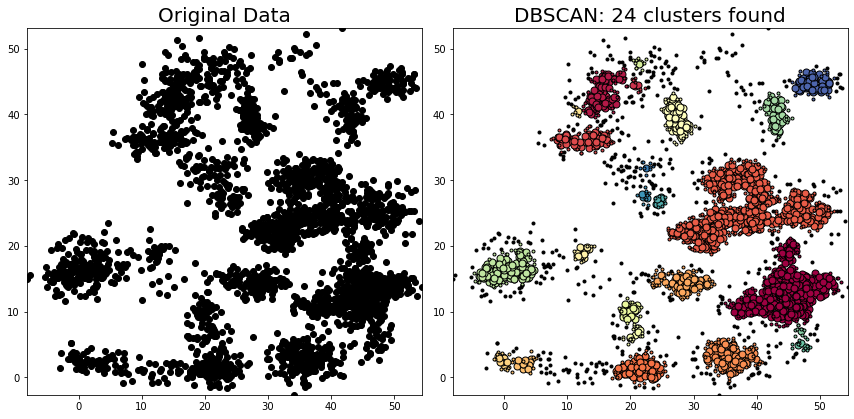

In [5]:
# Define max_distance (eps parameter in DBSCAN())
max_distance = 1.2
db = DBSCAN(eps=max_distance, min_samples=10).fit(data)
# Extract a mask of core cluster members
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# Extract labels (-1 is used for outliers)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

# Plot up the results!
min_x = np.min(data[:, 0])
max_x = np.max(data[:, 0])
min_y = np.min(data[:, 1])
max_y = np.max(data[:, 1])

fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(data[:,0], data[:,1], 'ko')
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('Original Data', fontsize = 20)

plt.subplot(122)
# The following is just a fancy way of plotting core, edge and outliers
# Credit to: http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('DBSCAN: %d clusters found' % n_clusters, fontsize = 20)
fig.tight_layout()
plt.subplots_adjust(left=0.03, right=0.98, top=0.9, bottom=0.05)

Como sabemos, DBSCAN es muy sensible a los parámetros $\varepsilon$ y MinPts. Vamos a hacer un estudio de cómo se comporta DBSCAN al variar los valores de estos parámetros.

**Actividad 3**
Para ello ejecuta en un bucle DBSCAN con el dataset que hemos construido, fijando MinPts=10 y variando el valor de $\varepsilon$ desde 1.0 hasta 3.5 en incrementos de 0.1 (en total debes experimentar con una secuencia de 25 valores 1.0, 1.1, 1.2, 1.3,...,3.5). Para cada ejecución debes guardarte en una lista (o array de numpy) el número de puntos etiquetados con '-1' que corresponden a los puntos ruido.
Igualmente guarda en otra lista el número de clusters que has obtenido en cada ejecución (esto lo puedes saber contando el número de etiquetas generadas en la ejecución)

Representa en dos gráficas los valores de estas listas.
**Interpreta las gráficas.**
Explica los resultados que obtienes.

<font color='blue'> 

Se observa un decrecimiento en el número de clusters a medida que aumenta el valore de epsilon. Esto tiene sentido, ya que a mayor radio, menor densidad de clusters y, por tanto, menos clusters.
    
También observa un decrecimiento en el número de puntos etiquetados como ruido a medida que aumenta epsilon. Esto se debe a que, al tener menos clusters, se aceptan más puntos ruido como parte de cada clusters.   
    

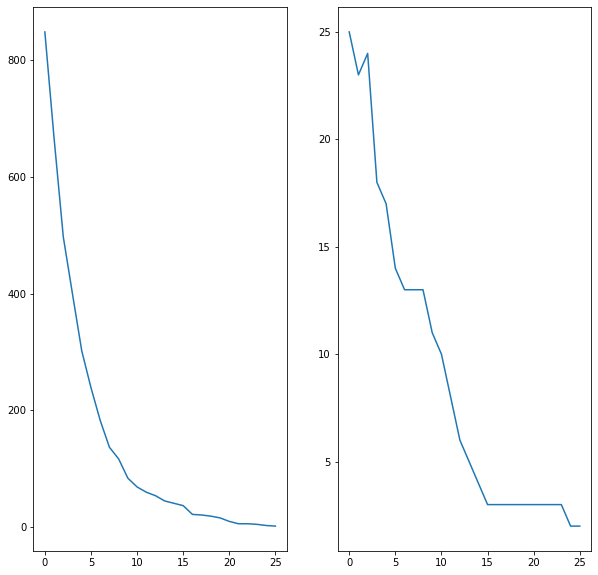

In [33]:
#Código de la Actividad 3 Sigue los pasos a continuación
#1. declara dos vectores  con np.zeros() para almacenar
#el número de puntos de ruido y el número de clusters

max_distances = np.arange(1.0, 3.6, 0.1)
MinPts = 10

noise = np.zeros(len(max_distances))
num_clusters = np.zeros(len(max_distances))


#2.bucle for donde:
for i in range(len(max_distances)):
    #a)preparas la distancia máxima para DBSCAN
    max_distance = max_distances[i]
    #b) Ejecutas  DBSCAN y recoges en un objeto el resultado
    db = DBSCAN(eps=max_distance, min_samples=MinPts).fit(data)
    #c) usa np.unique(db.labels_, return_counts=True) con las etiquetas del objeto obtenido
    # esto te devolverá entre otras cosas , una lista
    # usa la lista para ir rellenando los vectores del paso 1.
    values, counts = np.unique(db.labels_, return_counts=True)
    cont = 0
    for j in range(len(values)):
        if values[j] == -1:
            noise[i] = counts[j]
            cont += 1
    
    num_clusters[i] = len(values) - cont
    
    
    
    
#3. Dibuja usando plt.subplots
fig, uu =plt.subplots(nrows=1, ncols=2, figsize=(10,10))
uu[0].plot(noise)
uu[1].plot(num_clusters)


**Actividad 4** 
Repite el mismo estudio pero ahora fija el valor de $\varepsilon = 1.5$  y varía MinPts desde 1 hasta 20.
Representa en dos gráficas los valores de estas listas.
**Interpreta las gráficas.**
Explica los resultados que obtienes.

<font color='blue'>
    
A medida que aumenta MinPts, disminuye el número de clusters porque los clusters son cada vez más grandes. Esto causa que los clusters pequeños sean absorbidos por los grandes y que se conviertan en puntos ruido si están aislados. Esto se observa en la primera de las gráficas: a medida que aumenta MinPts, aumenta el ruido.

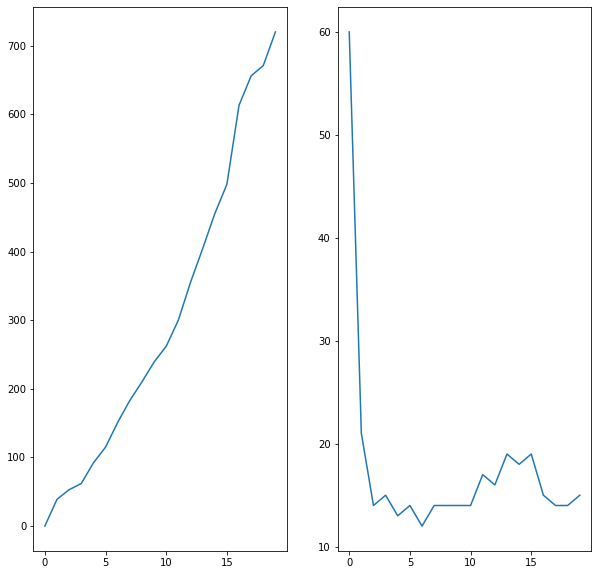

In [35]:
#Código de la Actividad 4 Sigue los pasos a continuación
#1. declara dos vectores  con np.zeros() para almacenar
#el número de puntos de ruido y el número de clusters

max_distance = 1.5
MinPtsList = np.arange(1, 21)

noise = np.zeros(len(MinPtsList))
num_clusters = np.zeros(len(MinPtsList))

#2.bucle for donde:
for i in range(len(MinPtsList)):
    #a)preparas la distancia máxima para DBSCAN
    MinPts = MinPtsList[i]
    #b) Ejecutas  DBSCAN y recoges en un objeto el resultado
    db = DBSCAN(eps=max_distance, min_samples=MinPts).fit(data)
    #c) usa np.unique(db.labels_, return_counts=True) con las etiquetas del objeto obtenido
    # esto te devolverá entre otras cosas , una lista
    # usa la lista para ir rellenando los vectores del paso 1.
    values, counts = np.unique(db.labels_, return_counts=True)
    cont = 0
    for j in range(len(values)):
        if values[j] == -1:
            noise[i] = counts[j]
            cont += 1
    
    num_clusters[i] = len(values) - cont
    
    
    
    
#3. Dibuja usando plt.subplots
fig, uu =plt.subplots(nrows=1, ncols=2, figsize=(10,10))
uu[0].plot(noise)
uu[1].plot(num_clusters)

### Actividad 5: Estudio del valor $\varepsilon$ con la gráfica del k-vecino más próximo.
Como sabes, una forma de estimar el valor de $\varepsilon$ consiste en trazar la gráfica que representa el k-vecino más próximo de todos los datos. Generalmente se suele calcular el 4-vecino más próximo.
Utiliza la clase 'NearestNeighbors' para obtener esta información y visualízala en una gráfica. Consulta en la documentación de scikit-learn cómo se comporta. CUIDADO!! Esta función considera como vecino al propio punto, así que el primer valor de la distancia en el vector de distancias a vecinos es 0.0. Para 4 vecinos, el parámetro de vecinos debe ser 5.

Cuando tengas la lista de distancias, no te olvides de ordenarla. De lo contrario no te saldrá la curva.

A partir de esa gráfica, selecciona un punto de la misma (que debería de coincidir  con el codo de la curva leyéndola desde la derecha) y a partir de ese punto, obtén el valor de la epsilon (que será el valor de la curva del punto elegido).


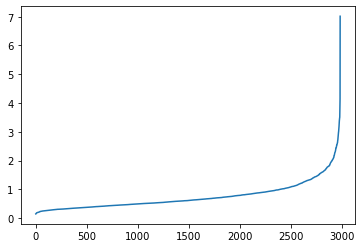

In [43]:
from sklearn.neighbors import NearestNeighbors
#continuar aquí definiendo el modelo NearestNeighbors.fit a los puntos 'data'
nbrs = NearestNeighbors()
nbrs.fit(data)

#El código anterior te devuelve un objeto con el modelo entrenado 
#obtén ahora las distancias usando el metodo .neighbors(data)
dist, nnbrs = nbrs.kneighbors(data)

#las distancias buscadas se encuentran en la componente [:,4] del array de 
#distancias devuelto por .neighbors(data)
dist_sort = np.sort(dist[:,4])

plt.plot(dist_sort)

**Explica aquí la elección de Epsilon que has hecho, cómo la has obtenido a partir de la gráfica y el porcentaje de ruido que admites**

<font color='blue'>
Nuestra elección es $\epsilon = 1.75$ porque es el valor de distancia que corresponde al codo de la curva. El porcentaje de ruido que admitimos sería, aproximadamente: $\frac{250}{3000}\times100 = 8.33$%.

### Actividad 6: Comparación con K-Means . 
Vamos a utilizar el algoritmo K-Means para agrupar el dataset anterior. El objetivo es comparar los resultados obtenidos con los de DBSCAN y ver si son significactivamente distintos.

Para ello, cargamos la librería de K_Means y hacemos lo siguiente:

Fase 1 Obtén la curva 'elbow' ejecutando 29 veces K-Means con valores de K desde 2 hasta 30 y recoge en una lista (o array de numpy) la variable 'score'.Visualiza la curva.


Fase 2 Elige un valor (o rango de valores) que sean adecuados para K segun la curva. Indica los valores que eliges. REaliza el KMean definitivo con el valor de k definitivo

**Fase 1: Curva Elbow: ** Rellena el código de la caja siguiente.

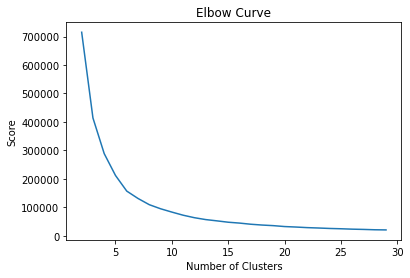

In [44]:
from sklearn.cluster import KMeans

Nc = range(2, 30)
score = []
#Incluye aquí un bucle de llamada al método *'fit()'* de KMeans con diferentes Ks (argumento n_clusters en la función KMeans) 
#y almacena en una lista llamada 'score' los valores *'inertia_'* de cada ejecución.
for i in Nc:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    score.append(kmeans.inertia_)

#Este código visualiza la curva
#plt es la importación de matplotlib.pyplot
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

**Fase 2: Realiza otra vez el agrupamiento K-Means definitivo para el valor K elegido 

In [45]:
kmeans = KMeans(n_clusters=6)#introduce un valor de K
kmeans.fit(data)#Introduce el dataset transformado y calcula el modelo
y_kmeans = kmeans.predict(data) #etiquetas de pertenencia a un cluster


Ejecuta el código de Visualización siguiente:

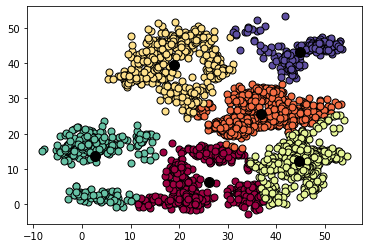

In [46]:
unique_labels = set(y_kmeans)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    
    class_member_mask = (y_kmeans == k)

    xy = data[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)
    
centers = kmeans.cluster_centers_

plt.plot(centers[:, 0], centers[:, 1], 'o', markerfacecolor='k',
             markeredgecolor='k', markersize=10);


Discute el parecido o la diferencia respecto al resultado obtenido con DBSCAN
**Discusión de resultados de la Actividad 6:**

<font color='blue'>
La diferencia es que KMeans no etiqueta puntos ruido, mientras que DBSCAN sí. Además, en algunos casos, KMeans fuerza a unir clusters y DBSCAN los separa demasiado. 

### Ejercicio 2: DBSCAN y el dataset con 3 anillos

Si recuerdas de la práctica anterior con agrupamiento espectral, el dataset de tres anillos concéntricos era un desafío sobre todo para valores de ruído grandes (valores de $\sigma$ 0.25 y 0.5)

Vamos a ver cómo se comporta DBSCAN en el mismo dataset.

Primero vamos a generar los puntos igual que hicimos en la práctica anterior.

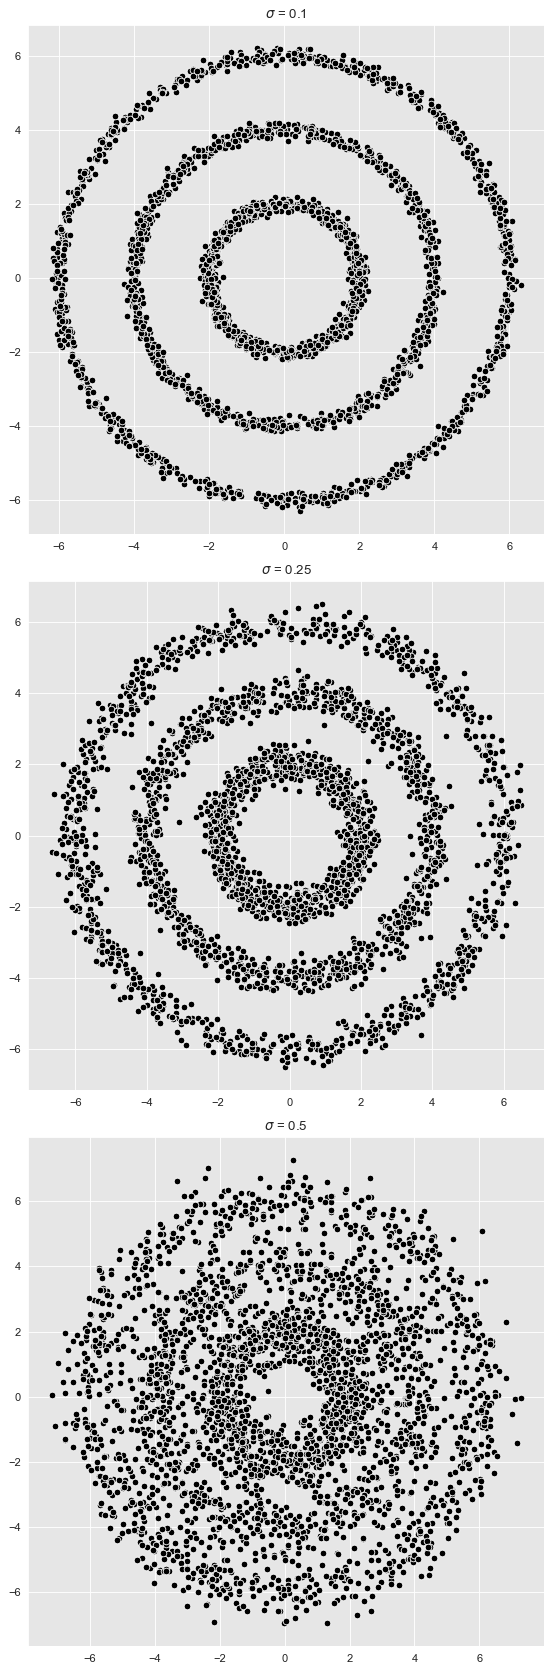

In [47]:
#Generación de los tres dataset
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Set random state. 
rs = np.random.seed(25)

def generate_circle_sample_data(r, n, sigma):
    """Generate circle data with random Gaussian noise."""
    angles = np.random.uniform(low=0, high=2*np.pi, size=n)

    x_epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)
    y_epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)

    x = r*np.cos(angles) + x_epsilon
    y = r*np.sin(angles) + y_epsilon
    return x, y


def generate_concentric_circles_data(param_list):
    """Generates many circle data with random Gaussian noise."""
    coordinates = [ 
        generate_circle_sample_data(param[0], param[1], param[2])
     for param in param_list
    ]
    return coordinates


# Set global plot parameters. 
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 80

# Number of points per circle. 
n = 1000
# Radius. 
r_list =[2, 4, 6]
# Standar deviation (Gaussian noise). 
sigmas = [0.1, 0.25, 0.5]

param_lists = [[(r, n, sigma) for r in r_list] for sigma in sigmas] 
# We store the data on this list.
coordinates_list = []

fig, axes = plt.subplots(len(sigmas), 1, figsize=(7, 21))

for i, param_list in enumerate(param_lists):

    coordinates = generate_concentric_circles_data(param_list)

    coordinates_list.append(coordinates)
    
    ax = axes[i]
    
    for j in range(0, len(coordinates)):
    
        x, y = coordinates[j]
        sns.scatterplot(x=x, y=y, color='black', ax=ax)
        ax.set(title=f'$\sigma$ = {param_list[0][2]}')

plt.tight_layout()

**Actividad 7a** Escribe el código de los pasos 1,2 y 3

**Paso 1.** Determinacion del radio epsilon con la grafica descendente de Epsilon-vecindad para el dataset de **sigma=0.1**

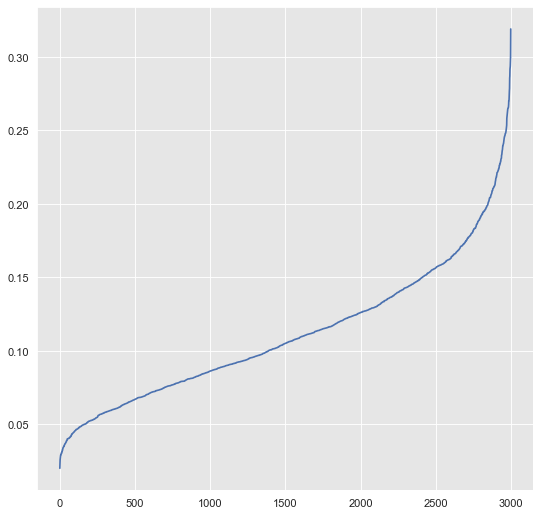

In [48]:
#Elegimos primero el dataset de sigma=0.1
dataset=coordinates_list[0]
d2_train_dataset = np.asarray(dataset)

nx = d2_train_dataset[0][0]
nx=np.append(nx,d2_train_dataset[1][0])
nx=np.append(nx,d2_train_dataset[2][0])

ny = d2_train_dataset[0][1]
ny=np.append(ny,d2_train_dataset[1][1])
ny=np.append(ny,d2_train_dataset[2][1])

l=[[nx[0],ny[0]]]


for i in range(1,len(nx)):
    l=np.append(l,[[nx[i],ny[i]]],axis=0)
    
#Utiliza aquí como antes 'NearestNeighbors' sobre el dataset 'l'
#y dibuja la curva para estimar epsilon
nbrs = NearestNeighbors()
nbrs.fit(l)

dist, nnbrs = nbrs.kneighbors(l)

dist_sort = np.sort(dist[:,4])

plt.plot(dist_sort)

**Paso 2**  Cálculo de los clusters con DBSCAN

In [49]:
#Uso de DBSCAN en los datos

#Damos formato de Frame al primer conjunto de datos generados anteriormente
from itertools import chain

coordinates = coordinates_list[0]

def data_frame_from_coordinates(coordinates): 
    """From coordinates to data frame."""
    xs = chain(*[c[0] for c in coordinates])
    ys = chain(*[c[1] for c in coordinates])

    return pd.DataFrame(data={'x': xs, 'y': ys})

data_df = data_frame_from_coordinates(coordinates)



# Define max_distance (eps parameter in DBSCAN())
max_distance = 0.17
data = np.array(coordinates)

#Completa esta llamada
db = DBSCAN().fit(data_df)


# Extract a mask of core cluster members
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# Extract labels (-1 is used for outliers)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

print(unique_labels)

{0, 1, 2}


**Paso 3** Dibujamos los clusters resultantes

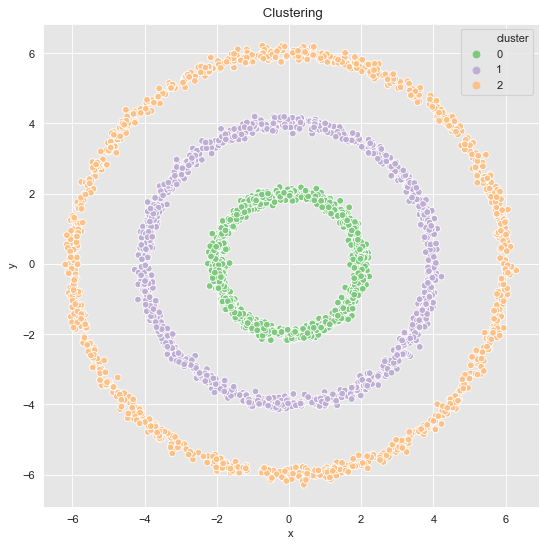

In [50]:
import matplotlib as mpl

fig, ax = plt.subplots()
sns.scatterplot(x='x', y='y', data=data_df.assign(cluster = labels), hue='cluster' , palette = 'Accent', ax=ax)
ax.set(title=' Clustering');



**Actividad 7b** Repite este proceso para el dataset de **sigma=0.25** y el de **sigma=0.5**


{0, 1, 2, -1}


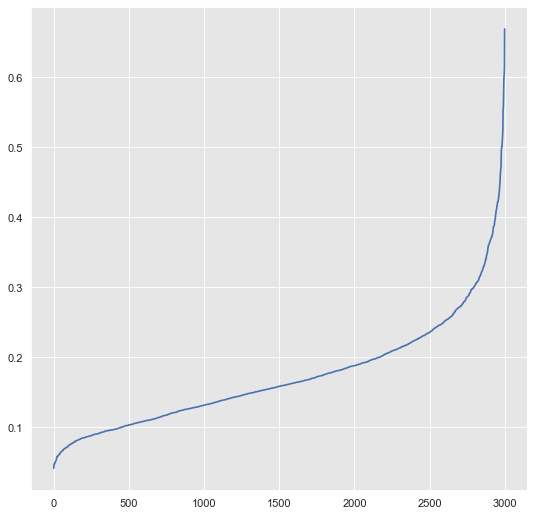

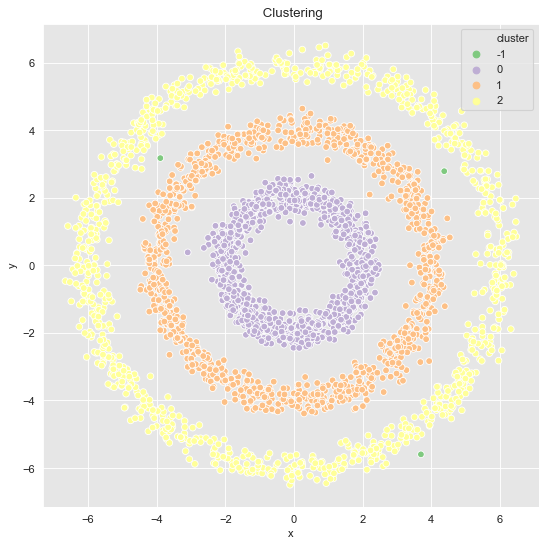

In [57]:
## PASO 1

#Elegimos primero el dataset de sigma=0.25
dataset=coordinates_list[1]
d2_train_dataset = np.asarray(dataset)

nx = d2_train_dataset[0][0]
nx=np.append(nx,d2_train_dataset[1][0])
nx=np.append(nx,d2_train_dataset[2][0])

ny = d2_train_dataset[0][1]
ny=np.append(ny,d2_train_dataset[1][1])
ny=np.append(ny,d2_train_dataset[2][1])

l=[[nx[0],ny[0]]]


for i in range(1,len(nx)):
    l=np.append(l,[[nx[i],ny[i]]],axis=0)
    
#Utiliza aquí como antes 'NearestNeighbors' sobre el dataset 'l'
#y dibuja la curva para estimar epsilon
nbrs = NearestNeighbors()
nbrs.fit(l)

dist, nnbrs = nbrs.kneighbors(l)

dist_sort = np.sort(dist[:,4])

plt.plot(dist_sort)


## PASO 2

coordinates = coordinates_list[1]

data_df = data_frame_from_coordinates(coordinates)



# Define max_distance (eps parameter in DBSCAN())
max_distance = 0.25
data = np.array(coordinates)

#Completa esta llamada
db = DBSCAN().fit(data_df)


# Extract a mask of core cluster members
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# Extract labels (-1 is used for outliers)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

print(unique_labels)


## PASO 3

fig, ax = plt.subplots()
sns.scatterplot(x='x', y='y', data=data_df.assign(cluster = labels), hue='cluster' , palette = 'Accent', ax=ax)
ax.set(title=' Clustering');

{0, -1}


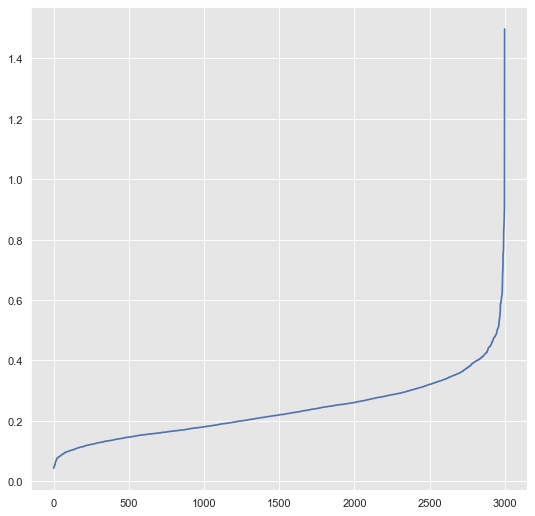

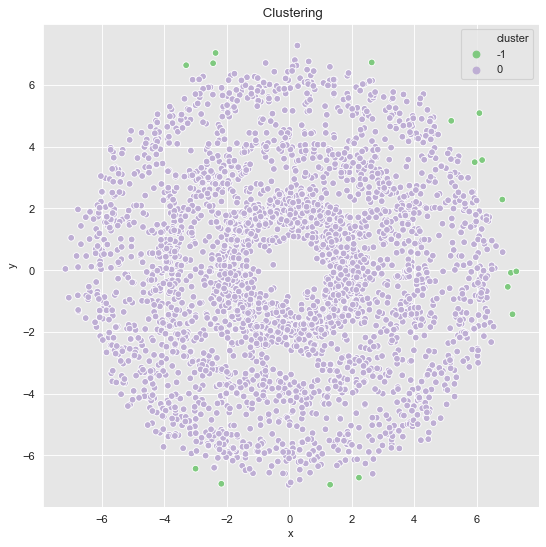

In [58]:
## PASO 1

#Elegimos primero el dataset de sigma=0.5
dataset=coordinates_list[2]
d2_train_dataset = np.asarray(dataset)

nx = d2_train_dataset[0][0]
nx=np.append(nx,d2_train_dataset[1][0])
nx=np.append(nx,d2_train_dataset[2][0])

ny = d2_train_dataset[0][1]
ny=np.append(ny,d2_train_dataset[1][1])
ny=np.append(ny,d2_train_dataset[2][1])

l=[[nx[0],ny[0]]]


for i in range(1,len(nx)):
    l=np.append(l,[[nx[i],ny[i]]],axis=0)
    
#Utiliza aquí como antes 'NearestNeighbors' sobre el dataset 'l'
#y dibuja la curva para estimar epsilon
nbrs = NearestNeighbors()
nbrs.fit(l)

dist, nnbrs = nbrs.kneighbors(l)

dist_sort = np.sort(dist[:,4])

plt.plot(dist_sort)


## PASO 2

coordinates = coordinates_list[2]

data_df = data_frame_from_coordinates(coordinates)



# Define max_distance (eps parameter in DBSCAN())
max_distance = 0.42
data = np.array(coordinates)

#Completa esta llamada
db = DBSCAN().fit(data_df)


# Extract a mask of core cluster members
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# Extract labels (-1 is used for outliers)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

print(unique_labels)


## PASO 3

fig, ax = plt.subplots()
sns.scatterplot(x='x', y='y', data=data_df.assign(cluster = labels), hue='cluster' , palette = 'Accent', ax=ax)
ax.set(title=' Clustering');

**Actividad 8:** Analiza los resultados. Compáralos con los obtenidos con el agrupamiento espectral de la práctica anterior. Indica sus parecidos y diferencias. ¿Podrías decantarte hacia uno de los dos métodos? Valora también la dificultad de manejo de los parámetros de cada método.

<font color='blue'>
Nos decantaríamos por DBSAN ya que, a nivel de sintonización de parámetros, DBSCAN es más sencillo. A nivel de resultados, solo funciona bien cuando la separación de los clusters está claramente diferneciada porque agrupa por densidad. Sin embargo, cuando esta separación está bien diferenciada, funciona muy bien y detecta también los puntos ruido (cosa que no hace el agrupamiento espectral).

## Ejercicio 3: OPTICS y los tres anillos

La aproximación de OPTICS es distinta. Recuerda que OPTICS no devuelve un conjunto de clusters como DBSCAN (es decir, etiqueta el dataset). Lo que hace OPTICS es **atribuir a cada punto del dataset** un par de propiedades que son:
-El radio core del dato
-La distancia de alcance.

De hecho, lo más útil de la salida de OPTICS es este último valor: la distancia de alcance. Con esta distancia y **ordenando los puntos del dataset por el orden de proceso** obtenemos el **Diagrama de Alcance** donde podemos observar la distribución de los clusters posibles en ese dataset.

**Paso 1**
Vamos a trabajar con el primer dataset (sigma=0.1)

La ventaja de OPTICS es que no es sensible a los parámetros de la forma en que lo es DBSCAN, como has comprobado en la primera parte. En OPTICS debes elegir los valores de epsilon y MinPts grandes para que, a partir de ahí, OPTICS vaya  considerando epsilon-vecindades más pequeñas.
De hecho en la implementación de scikit-learn puedes no configurar el parámetro epsilon, y ella lo pondrá por defecto a valor infinito. 

In [62]:
from sklearn.cluster import OPTICS,  cluster_optics_dbscan

coordinates = coordinates_list[0]
data_df = data_frame_from_coordinates(coordinates)

#Llama a OPTICS con un número de MinPts elevado, por ejemplo 15
clustering = OPTICS(min_samples=15).fit(data_df)

print(clustering)


OPTICS(min_samples=15)


**Paso 2** Vamos a dibujar el diagrama de alcances. Para ello dispones de dos métodos útiles en la clase OPTICS, son :
reachability_  que te da los valores de distancia de alcance para cada dato
ordering_ que es la lista de indices de los datos en el orden en que hansido procesados
Puedes usar ordering_ como lista iterable dentro de la lista reachability_ para ordenar las distancios por el orden de procesamiento de los datos

NOTA: Antes de dibujar el diagrama de alcance, como las distancias son muy pequeñas, vamos a amplificarlas para verlas mejor. Multiplica los valores de la lista ordenada que has obtenido por 100 y quédate solo con la parte entera de los mismos (para ello usa 

reach_int = <nombre de la lista>.astype(int) #donde reach_int es el nombre arbitrario elegido para la lista ordenada y amplificada y redondeada.

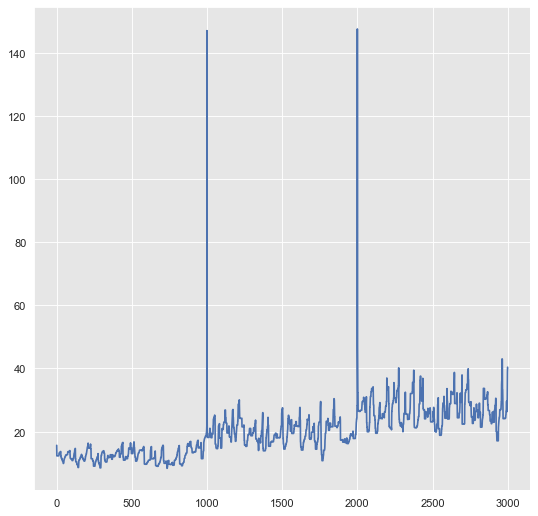

In [64]:
#Haz todo lo anterior aquí
reach = (clustering.reachability_[clustering.ordering_] * 100)


#visualiza la gráfica
plt.plot(reach)

**Actividad 9** Analiza la gráfica de alcances que has obtenido.

<font color='blue'>
En la gráfica de alcances, se pueden diferenciar los 3 clusters del dataset.
</font>

Por último, nos gustaría poder etiquetar los datos en una de las multiclasificaciones que ofrece OPTICS para visualizar los clusters que se obtienen de ella. Específicamente nos gustaría etiquetar los datos para la clusterización en tres grupos que se aprecia claramente en la gráfica. 
Para ello scikit nos ofrece un método llamado 'cluster_optics_dbscan' donde podemos etiquetar de los datos en función del parámetro epsilon.

Experimenta con este método probando diferentes valores de epsilon  hasta que te salga la clusterización que deseas. Ejecuta las tres cajas de código de abajo para visualizar el resultado.



In [65]:
#Experimenta con el parámetro eps
labels_050 = cluster_optics_dbscan(reachability=clustering.reachability_,
                                   core_distances=clustering.core_distances_,
                                   ordering=clustering.ordering_, eps=0.1)

In [66]:
print(labels_050)

[-1 -1 -1 ... -1 -1 -1]


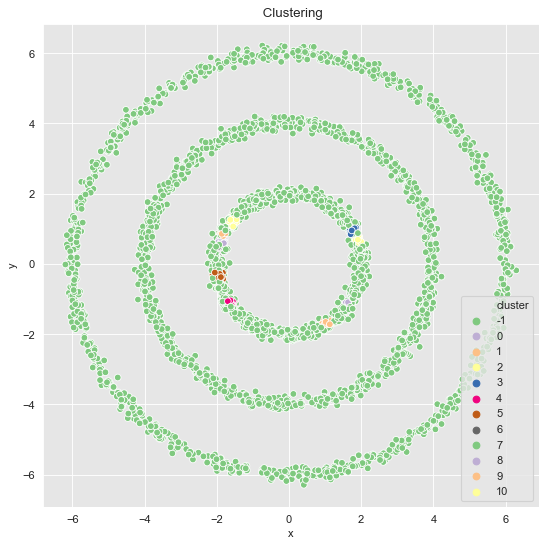

In [67]:
#visualiza
fig, ax = plt.subplots()
sns.scatterplot(x='x', y='y', data=data_df.assign(cluster = labels_050), hue='cluster' , palette = 'Accent', ax=ax)
ax.set(title=' Clustering');

In [71]:
#Experimenta con el parámetro eps
labels_050 = cluster_optics_dbscan(reachability=clustering.reachability_,
                                   core_distances=clustering.core_distances_,
                                   ordering=clustering.ordering_, eps=0.25)

In [72]:
print(labels_050)

[ 0  0  0 ... -1 -1 -1]


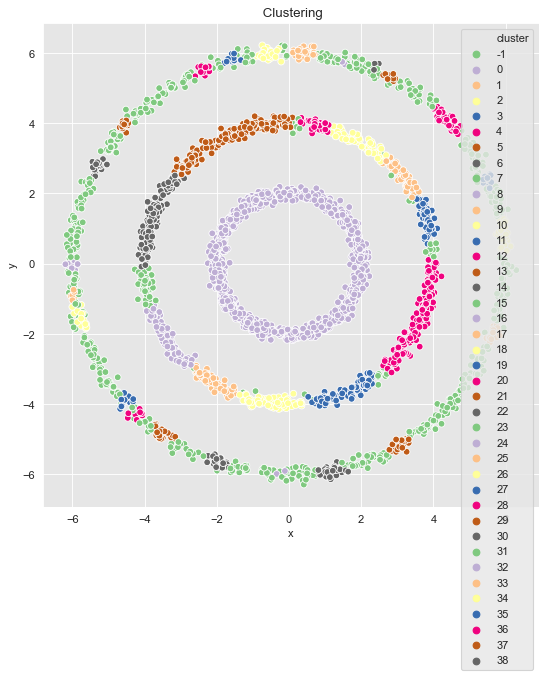

In [73]:
#visualiza
fig, ax = plt.subplots()
sns.scatterplot(x='x', y='y', data=data_df.assign(cluster = labels_050), hue='cluster' , palette = 'Accent', ax=ax)
ax.set(title=' Clustering');

In [74]:
#Experimenta con el parámetro eps
labels_050 = cluster_optics_dbscan(reachability=clustering.reachability_,
                                   core_distances=clustering.core_distances_,
                                   ordering=clustering.ordering_, eps=0.5)

In [75]:
print(labels_050)

[0 0 0 ... 2 2 2]


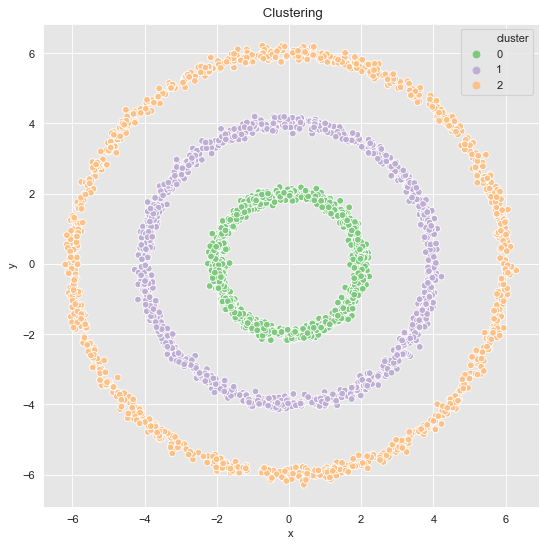

In [76]:
#visualiza
fig, ax = plt.subplots()
sns.scatterplot(x='x', y='y', data=data_df.assign(cluster = labels_050), hue='cluster' , palette = 'Accent', ax=ax)
ax.set(title=' Clustering');

**Conclusiones:** Indica aquí los pasos y pruebas que has realizado

<font color='blue'>
    
- **$\epsilon = 0.1$**: Se obtienen demasiados clusters (11) y mucho ruido.

- **$\epsilon = 0.25$**: Se obtienen demasiados clusters (39) y mucho ruido todavía.

- **$\epsilon = 0.5$**: Funciona perfectamente.

**Actividad 10** Repite este análisis para el dataset sigma=0.25. 

Nota: Para los dataset sigma=0.1 y sigma=0.25 hay un valor de epsilon al menos que agrupa correctamente los datos. 

In [77]:
coordinates = coordinates_list[1]
data_df = data_frame_from_coordinates(coordinates)

#Llama a OPTICS con un número de MinPts elevado, por ejemplo 15
clustering = OPTICS(min_samples=15).fit(data_df)

print(clustering)

OPTICS(min_samples=15)


In [87]:
#Experimenta con el parámetro eps
labels_050 = cluster_optics_dbscan(reachability=clustering.reachability_,
                                   core_distances=clustering.core_distances_,
                                   ordering=clustering.ordering_, eps=0.25)

In [88]:
print(labels_050)

[-1 -1  0 ... -1 -1 -1]


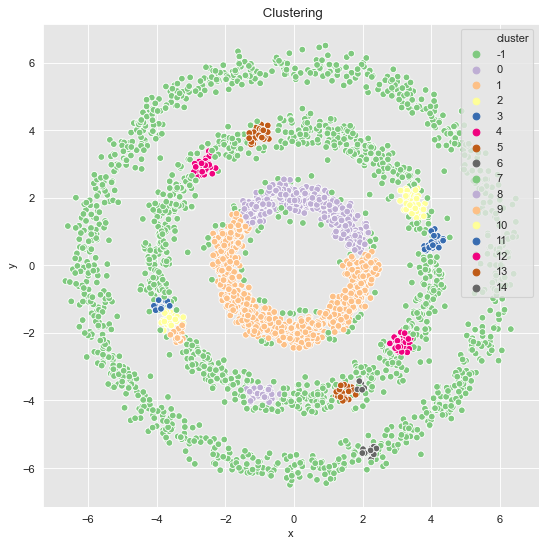

In [89]:
#visualiza
fig, ax = plt.subplots()
sns.scatterplot(x='x', y='y', data=data_df.assign(cluster = labels_050), hue='cluster' , palette = 'Accent', ax=ax)
ax.set(title=' Clustering');

In [90]:
#Experimenta con el parámetro eps
labels_050 = cluster_optics_dbscan(reachability=clustering.reachability_,
                                   core_distances=clustering.core_distances_,
                                   ordering=clustering.ordering_, eps=0.5)

In [91]:
print(labels_050)

[0 0 0 ... 2 3 2]


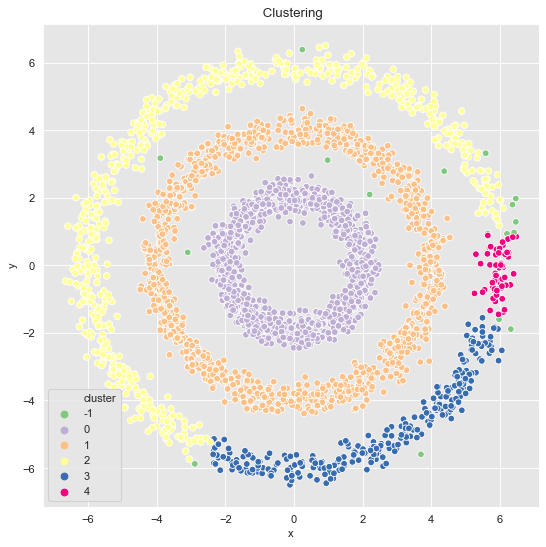

In [92]:
#visualiza
fig, ax = plt.subplots()
sns.scatterplot(x='x', y='y', data=data_df.assign(cluster = labels_050), hue='cluster' , palette = 'Accent', ax=ax)
ax.set(title=' Clustering');

In [99]:
#Experimenta con el parámetro eps
labels_050 = cluster_optics_dbscan(reachability=clustering.reachability_,
                                   core_distances=clustering.core_distances_,
                                   ordering=clustering.ordering_, eps=0.6)

In [100]:
print(labels_050)

[0 0 0 ... 2 2 2]


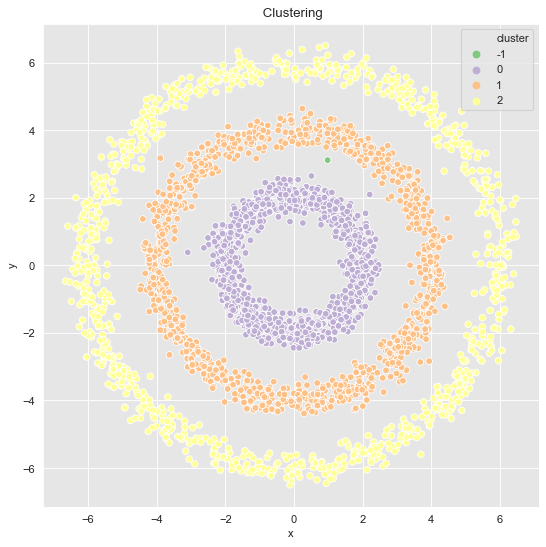

In [101]:
#visualiza
fig, ax = plt.subplots()
sns.scatterplot(x='x', y='y', data=data_df.assign(cluster = labels_050), hue='cluster' , palette = 'Accent', ax=ax)
ax.set(title=' Clustering');

**Conclusiones de la Actividad 10:** Describe aquí los resultados que has obtenido y compara 
    los agrupamientos que puedes realizar con OPTICS  con los que has realizado con DBSCAN 
    y expón tus conclusiones acerca del mejor método para estos datasets.
    
<font color='blue'>
    DBSCAN requiere mayor trabajo, al ser más sensible a los parámetros. En cambio, en OPTICS solo necesitamos que los valores de los parámetros sean lo suficientemente grandes para que quepan en su interior agrupaciones más finas (todos los clusters que tengan un radio mayor que el $\epsilon$ propuesto no saldrán representados en la gráfica).